![title](http://cfile212.uf.daum.net/image/99D0F2335A1AE264149F37)

# 3. PCA-based novelty detection

## 1) Reconstruction기반

![title](http://cfile227.uf.daum.net/image/999EE3335A1AE2642D09B3)

## 2) Python Code

In [24]:
%matplotlib inline
import numpy as np
import random
import csv
import matplotlib.pyplot as plt

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(2):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

                
def pca(X,n): 

    #1st Step : subtract mean 
    avg = np.mean(X,axis=0)
    avg = np.tile(avg,(X.shape[0],1)) 
    X -= avg; 
    #print(avg)

    #2nd Step : covariance matrix 
    C = np.dot(X.transpose(),X)/(X.shape[0]-1)

    #3rd Step : Eigen Value, Eigen Vector 
    eig_values,eig_vecs = np.linalg.eig(C)

    #4rd Step : Select n개의 PC 
    idx = np.argsort(eig_values)[-n:][::-1]
    eig_values = eig_values[idx] 
    eig_vecs = eig_vecs[:,idx] 
    
    #print(eig_values.argsort())
    #print(eig_values.argsort()[-n:])
    #print(idx)
    #print(eig_values)
    #print(eig_vecs)
 
    #5th Step : new coordinate in new space 
    Y = np.dot(X,eig_vecs) 

    #6th Step : reconstruction 
    rec=np.dot(eig_vecs,Y.transpose())
    
    #Get NovetyScore
    Score=np.linalg.norm(X.transpose()-rec,axis=0)     
    
    #print(rec)
    #print(Score)
    
    return (X.transpose(), rec, Score.transpose(), eig_vecs, eig_values)

![title](http://cfile204.uf.daum.net/image/99BF4B335A1AE2642B5C1D)

=======================================================================================================================

![title](http://cfile213.uf.daum.net/image/9930A0335A1AE264226631)

=======================================================================================================================

![title](http://cfile225.uf.daum.net/image/99F88F335A1AE265126D2A)

## 3) 결과

Eigen Value :  [ 1.24512068]
Eigen Vector :  [[ 0.72542851]
 [ 0.68829752]]
Data X :  [[-0.67161403 -0.44645554]
 [ 0.91438262  1.45595509]
 [-0.6448558  -1.02777988]
 [-2.2743718  -1.35273825]
 [-0.50774248 -1.26846451]
 [-1.00524144 -0.69462396]
 [ 1.25870619  1.45709821]
 [ 0.32823318 -0.26765691]
 [-1.87259869 -1.03672204]
 [ 0.62194987  0.82089709]]
Reconstruction :  [[-0.57635455 -0.5468539 ]
 [ 1.20816455  1.14632477]
 [-0.85253456 -0.80889766]
 [-1.87231685 -1.7764825 ]
 [-0.90055554 -0.8544607 ]
 [-0.87583795 -0.83100827]
 [ 1.3899344   1.31879075]
 [ 0.03908762  0.03708693]
 [-1.50309489 -1.42615913]
 [ 0.73718161  0.69944904]]
Novelty Score :  [ 0.1383987   0.42682404  0.30172818  0.58412958  0.57070243  0.18800517
  0.19065623  0.42008804  0.53683732  0.1674156 ]


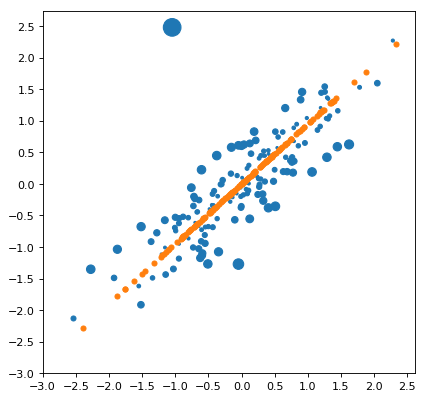

In [23]:
def main():

	# prepare data
    trainingSet=[]
    testSet=[]
    split = 0.8
    random.seed(100)
    loadDataset('C:/Users/myunghoon/.spyder-py3/ex_pca5.csv', split, trainingSet, testSet)
    #print('Train set: ' + repr(len(trainingSet)))
    #print('Test set: ' + repr(len(testSet)))

    # n=PC개수 (Hyper parameter)  
    n=1
    trainX=np.array(trainingSet)
    pca_result=pca(trainX[:,:-1].astype(np.float),n)

   # print('pca result:',pca_result)

    x=pca_result[0][0]
    y=pca_result[0][1]
    Score=pca_result[2]*100

    print('Eigen Value : ', pca_result[4])
    print('Eigen Vector : ', pca_result[3])    
    print('Data X : ', np.transpose(pca_result[0])[:10])
    print('Reconstruction : ', np.transpose(pca_result[1])[:10])
    print('Novelty Score : ', np.transpose(pca_result[2])[:10])
        
    x_rec=pca_result[1][0]
    y_rec=pca_result[1][1]
    
    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(x,y,s=Score);
    plt.scatter(x_rec,y_rec,s=20);
    plt.xticks(np.arange(-3,3,0.5))
    plt.yticks(np.arange(-3,3,0.5))
         
main()

## 4) 결과 @패키지 사용

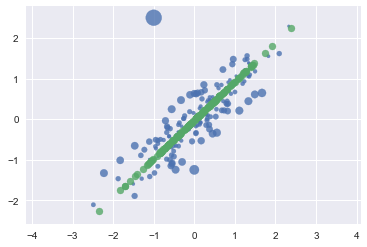

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import csv


def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(2):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def main():

	# prepare data
    trainingSet=[]
    testSet=[]
    split = 0.8
    random.seed(100)
    loadDataset('ex_pca5.csv', split, trainingSet, testSet)
    #print('Train set: ' + repr(len(trainingSet)))
    #print('Test set: ' + repr(len(testSet)))

    trainX=np.array(trainingSet)
    X=trainX[:,:-1].astype(np.float)

    pca = PCA(n_components=1)
    pca.fit(X)
    X_pca = pca.transform(X)
    #print("original shape:   ", X.shape)
    #print("transformed shape:", X_pca.shape)

    X_new = pca.inverse_transform(X_pca)
    Score = np.linalg.norm(X-X_new,axis=1)
    
    
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8,s=Score*100)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');
    
main()

## 5) Computing시간 비교 (매뉴얼 vs 패키지)

매뉴얼 = 0.117초, 패키지 = 0.116초